In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv('datasets/loan_data.csv')

In [3]:
df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Text(0.5,0,'FICO')

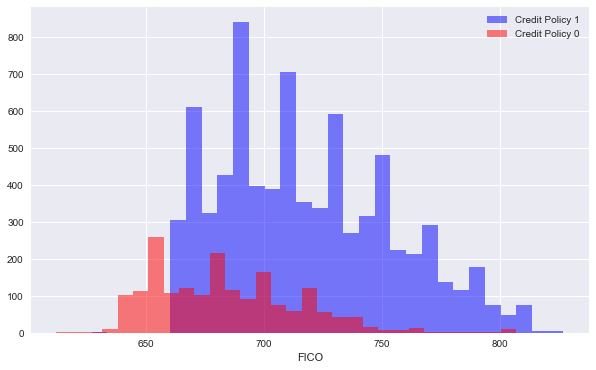

In [8]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                       bins=30,label='Credit Policy 1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                       bins=30,label='Credit Policy 0')
plt.legend()
plt.xlabel('FICO')

Text(0.5,0,'FICO')

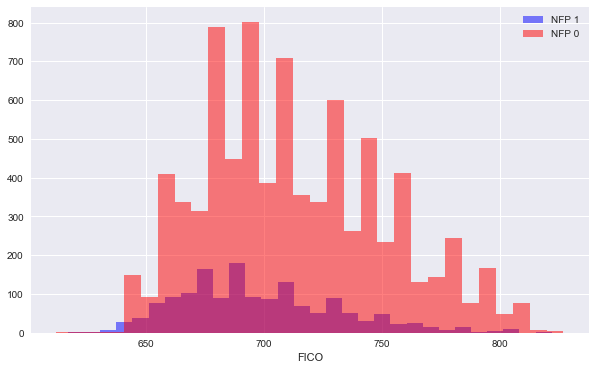

In [9]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                       bins=30,label='NFP 1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                       bins=30,label='NFP 0')
plt.legend()
plt.xlabel('FICO')

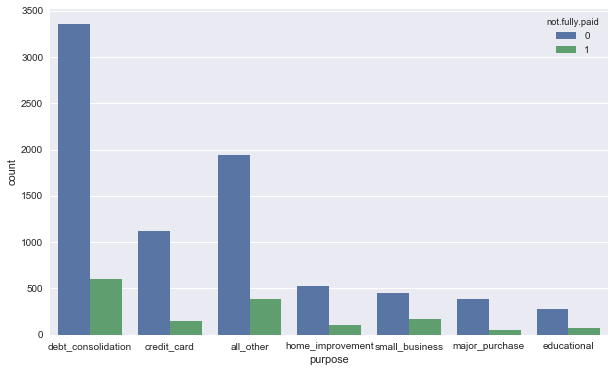

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',data=df,hue='not.fully.paid')

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


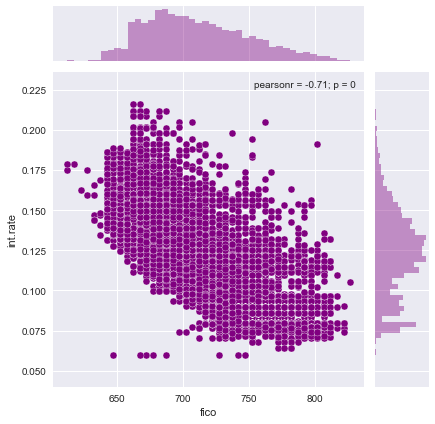

In [16]:
sns.jointplot('fico','int.rate',df,color='purple',joint_kws={'edgecolor':
                                                              'white'})

<Figure size 864x432 with 0 Axes>

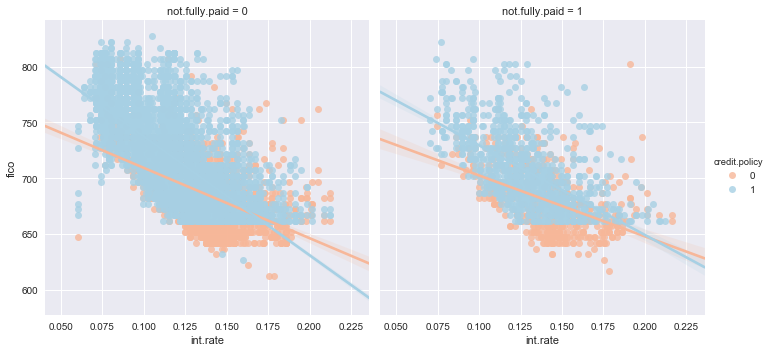

In [26]:
plt.figure(figsize=(12,6))
sns.lmplot('int.rate','fico',df,col='not.fully.paid',hue='credit.policy',
          palette='RdBu')

In [28]:
cat_feat=['purpose']
data=pd.get_dummies(df,columns=cat_feat,drop_first=True)

In [29]:
data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree=DecisionTreeClassifier()

In [32]:
from sklearn.cross_validation import train_test_split

In [35]:
X=data.drop('not.fully.paid',axis=1)
y=data['not.fully.paid']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)

In [37]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
dtree_pred=dtree.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix 

In [40]:
print(classification_report(y_test,dtree_pred),'\n',
      confusion_matrix(y_test,dtree_pred))

             precision    recall  f1-score   support

          0       0.85      0.84      0.84      2650
          1       0.20      0.20      0.20       511

avg / total       0.74      0.74      0.74      3161
 
 [[2230  420]
 [ 407  104]]


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
ranf=RandomForestClassifier(n_estimators=200)

In [45]:
ranf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
ranf_pred=ranf.predict(X_test)

In [47]:
print(classification_report(y_test,ranf_pred),'\n',
      confusion_matrix(y_test,ranf_pred))

             precision    recall  f1-score   support

          0       0.84      0.99      0.91      2650
          1       0.31      0.02      0.03       511

avg / total       0.75      0.84      0.77      3161
 
 [[2632   18]
 [ 503    8]]
